In [ ]:
# 先查看python版本，新版本pyecharts 不兼容 python3.6以下
! python -V


Python 3.7.12


In [ ]:
# 安装pyecharts 库
! pip install pyecharts

     |████████████████████████████████| 135 kB 5.1 MB/s 
     |████████████████████████████████| 129 kB 55.3 MB/s 


##数据修改，因为 有两列位置，所以需要删除第三列或者给他重命名，保留最后一列，这才是我们需要的数据

## 上传数据 点击左侧的文件夹标志，然后选择右上角的上传标志
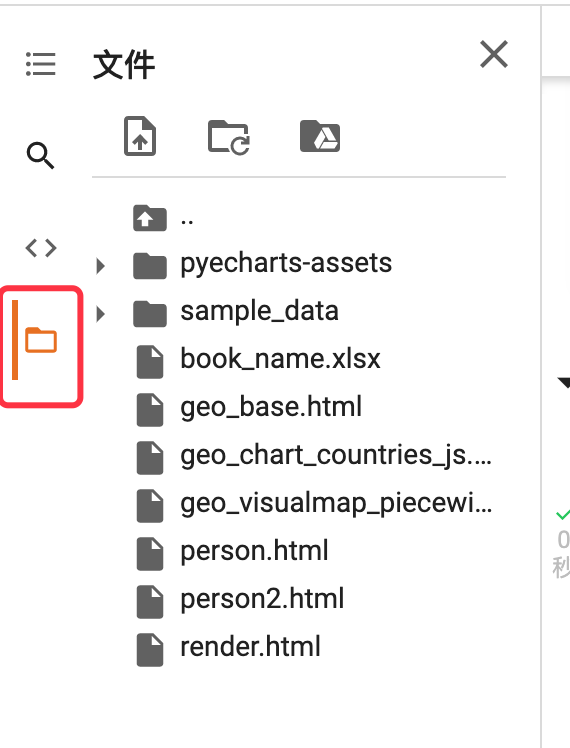


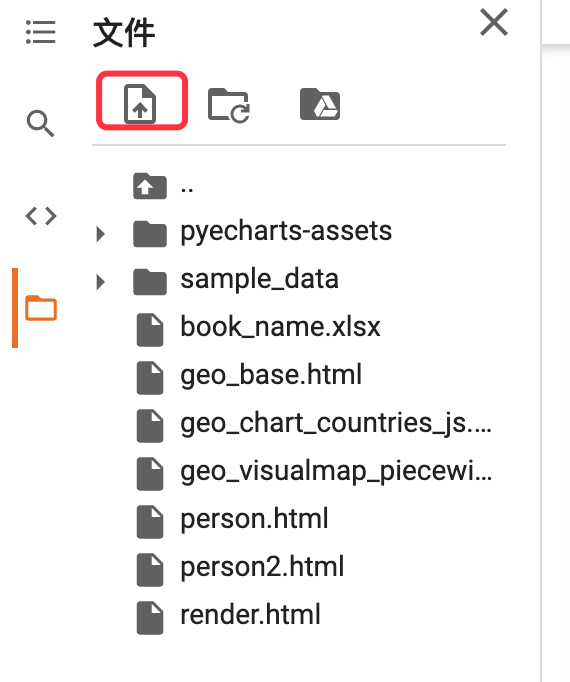

#地图可视化

In [ ]:
from pyecharts.faker import Faker
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.globals import ChartType, SymbolType
import pandas as pd
import json
from pyecharts.charts import Map
# 预设每个州的人数为0
state_num={
  'Alabama': 0,
  'Alaska': 0,
  'Arizona': 0,
  'Arkansas': 0,
  'California': 0,
  'Colorado': 0,
  'Connecticut': 0,
  'Delaware': 0,
  'Florida': 0,
  'Georgia': 0,
  'Hawaii': 0,
  'Idaho': 0,
  'Illinois': 0,
  'Indiana': 0,
  'Iowa': 0,
  'Kansas': 0,
  'Kentucky': 0,
  'Louisiana': 0,
  'Maine': 0,
  'Maryland': 0,
  'Massachusetts': 0,
  'Michigan': 0,
  'Minnesota': 0,
  'Mississippi': 0,
  'Missouri': 0,
  'Montana': 0,
  'Nebraska': 0,
  'Nevada': 0,
  'New Hampshire': 0,
  'New Jersey': 0,
  'New Mexico': 0,
  'New York': 0,
  'North Carolina': 0,
  'North Dakota': 0,
  'Ohio': 0,
  'Oklahoma': 0,
  'Oregon': 0,
  'Pennsylvania': 0,
  'Rhode Island': 0,
  'South Carolina': 0,
  'South Dakota': 0,
  'Tennessee': 0,
  'Texas': 0,
  'Utah': 0,
  'Vermont': 0,
  'Virginia': 0,
  'Washington': 0,
  'West Virginia': 0,
  'Wisconsin': 0,
  'Wyoming': 0
}

# 读取球队所在的州
df21 = pd.read_excel('book_name.xlsx',sheet_name='所在球队分布',header = 0)                              
postion = df21['位置']
# 统计每个州出现的次数，即是每个州的人数
from collections import Counter
# 转换成字典形式：key 州名 value 人数
c = dict(Counter(postion))

# 获取 key
states = list(c.keys())
# 获取值
nums=list(c.values())

# 更新初始 字典中 洲对应人数的值
for i in range(len(states)):
    state_num[str(states[i])]=nums[i]

states = list(state_num.keys())
nums=list(state_num.values()) 
# 计算最大人数 
max_num = max(nums)  


def geo_visualmap_piecewise() -> Geo:
  #创建地图
   c = (
      Map(
          # 设置背景色
          init_opts=opts.InitOpts( bg_color = '#EEEEE8')
      )
      # 添加数据，选择美国地图
      .add("", [list(z) for z in zip(states, nums)], "美国",is_map_symbol_show=False,)
      # 设置，标题，地图样式
      .set_global_opts(title_opts=opts.TitleOpts(title="球队人数分布示例"), 
                       visualmap_opts=opts.VisualMapOpts(max_=max_num,is_piecewise=False
                                                         ,range_color = ['#CCEBFF','#22DDDD','#0099FF','#003D66']),
                         
                      )
      # .render_notebook()
    )
   return c
# 调用地图生成函数
c=geo_visualmap_piecewise()
# 生成地图html文件
#本来 直接调用 render_notebok()可以直接显示，在我本地机器上可以显示，在colab 无法显示
c.render()
# 显示地图
import IPython
IPython.display.HTML(filename='/content/render.html')


